# RISE
https://murabitoleg.com/python-rise/

In [40]:
%%HTML
<link rel="stylesheet" type="text/css" href="my_rise.css">

In [12]:
import MeCab

# 自然言語処理のキソ

- 本発表ではトーン分析をとりあげます

# 記述情報のトーン分析

## 発表者：湯浅 大地

## 自然言語
- 自然言語とは、私たちが普段使っている言葉のこと
- プログラミング言語などの人工的に作られた言語の対比として「自然」と呼ばれる

## 自然言語処理のやりたいこと
- 自然言語を数学的に表現する⇨機械学習、AIに応用することができる

## 自然言語の数量化
- 文章のベクトル化
- 単語のベクトル化
- テキストのトーン（ネガポジ度）

# 記述情報のトーンが株式市場に影響を与えているか検証
- 先行研究では財務情報に情報内容を有していることが明らかとなっている
- 記述情報の研究の蓄積は十分ではない
- 記述情報に情報内容を有していれば、投資家は公表された記述情報を新情報として認識している可能性
- そこで本発表では記述情報のトーンが株式市場に影響を与えているか検証する

# トーン分析
## テキストのトーン（ネガティブ／ポジティブ）を定量化

また、記述情報は財務情報と同時期に公開されるため、
利益変化によって起こる株価変動をコントロールする必要がある
日本の記述情報が情報内容を有しているとすれば、投資家は公表された記述情報を新情報として認識し、
株式市場の価格に反映させる結果、株価が変動するはずである。

## トーンの算出方法
- 極性辞書ベースに推計（★本発表では←を採用する）
- 機械学習を利用して、正解付きコーパスを学習させる

## トーン分析（極性辞書ベース推計）の手順
- 形態素解析
- 極性辞書ベースにネガポジ判定

## 形態素解析

- テキストを形態素と呼ばれる単位に分割し、各形態素に対して品詞を付与する処理のこと
- 日本語は英語と違って文章が単語ごとに区切られていない
- 日本語を形態素解析できるソフトウェアとして広く使われているのはMeCab

## MeCab

- 京都大学とNTTの基礎研究所が共同開発したもの
- オープンソースソフトウェアでダウンロード、使用が全て無料
- 内蔵されているIPA辞書という日本語辞書には約40万語の単語が登録されている

In [11]:
tagger = MeCab.Tagger('-Ochasen')
testNode = tagger.parseToNode("企画書に書かれた斬新な構想に、わくわくしました")
while testNode:
    print(testNode.feature)
    testNode = testNode.next

BOS/EOS,*,*,*,*,*,*,*,*
名詞,サ変接続,*,*,*,*,企画,キカク,キカク
名詞,接尾,一般,*,*,*,書,ショ,ショ
助詞,格助詞,一般,*,*,*,に,ニ,ニ
動詞,自立,*,*,五段・カ行イ音便,未然形,書く,カカ,カカ
動詞,接尾,*,*,一段,連用形,れる,レ,レ
助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
名詞,形容動詞語幹,*,*,*,*,斬新,ザンシン,ザンシン
助動詞,*,*,*,特殊・ダ,体言接続,だ,ナ,ナ
名詞,サ変接続,*,*,*,*,構想,コウソウ,コーソー
助詞,格助詞,一般,*,*,*,に,ニ,ニ
記号,読点,*,*,*,*,、,、,、
副詞,助詞類接続,*,*,*,*,わくわく,ワクワク,ワクワク
動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
助動詞,*,*,*,特殊・マス,連用形,ます,マシ,マシ
助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
BOS/EOS,*,*,*,*,*,*,*,*


In [13]:
def word_tokenaize(doc):
    tagger.parse("")  # 追加←これを最初にやっておかないと文字コードのエラーがでてくる（なぜ！！）
    node = tagger.parseToNode(doc)

    result = []
    while node:
        hinshi = node.feature.split(",")[0]
        if hinshi not in ["BOS/EOS","記号"]:          
            base = node.feature.split(",")[6]
            if base == '*':
                base = node.surface
            result.append(base)
        node = node.next
    # print('i') 
    return ' '.join(result)

## 形態素解析し、単語の原形になおす

In [16]:
word_tokenaize("企画書に書かれた斬新な構想に、わくわくしました")

'企画 書 に 書く れる た 斬新 だ 構想 に わくわく する ます た'

# 極性辞書ベースで推計
- 東北大の乾・岡崎研究室が公開されている「日本語評価極性辞書」（★）
- 東工大の高村教授が公開されている「単語感情極性対応表」

In [21]:
import json

#  乾辞書
noun_dict = json.load(open('pn_noun.json'))
wago_dict = json.load(open('pn_wago.json'))

In [38]:
def inuiScore(wakati):
    p_count = 0
    n_count = 0
    wlist = wakati.split()
    for text in wlist:
        if text in noun_dict:
            if noun_dict[text] == 'p' or noun_dict[text] == 'ポジ（評価）':
                print('ポジティブ：'+text)
                p_count = p_count + 1
            else:
                print('ネガティブ：'+text)
                n_count = n_count + 1
        elif text in wago_dict:
            if wago_dict[text] == 'p' or wago_dict[text] == 'ポジ（評価）':
                print('ポジティブ：'+text)
                p_count = p_count + 1
            else:
                print('ネガティブ：'+text)
                n_count = n_count + 1
    return ([p_count, n_count])

## ネガポジ単語の抽出

In [39]:
inuiScore(word_tokenaize("企画書に書かれた斬新な構想に、わくわくしました"))

ポジティブ：斬新
ポジティブ：わくわく


[2, 0]

## 指標の作成
- ポジティブ単語数　/ （ポジティブ単語数 ＋ ネガティブ単語数）

# サンプル
## 財務データ、株価等市場関連データ：
- 日経NEEDS FinancialQUEST、Quick Astra Manager及び東洋経済会社四季報

## テキストデータ：
- プロネクサス社が提供する企業情報データベースeol

## サンプルの選択
- 2009年3月期から2017年3月期
- 東証一部上場
- 連結決算企業
- 3月末決算
- 銀行、証券、保険、その他金融に属する企業を除く
- 決算月数が12ヶ月

## 記述情報
- 業績等の概要
- 財政状態、経営成績およびキャッシュ・フローの状況の分析
- 事業等のリスク
- 生産、受注及び販売の状況

(cumulative abnormal returns)

## 回帰モデル１
$$ CAR［Yuho］_{it}
= α + β_1Tone［Performance］_{it}
+ β_2Tone［MD\&A］_{it}
+ β_3Tone［Risk］_{it}
+ β_4Tone［Sales］_{it}
+ β_4\Delta NIncome_{it} + ε_{it} $$

## 目的変数／説明変数
- CAR［Yuho］:有価証券報告書提出日周辺の3日間の規模調整済みの異常日次リターン累積値
- Tone［Performance］:業績等の概要のトーン
- Tone［MD&A］:財政状態、経営成績およびキャッシュ・フローの状況の分析のトーン
- Tone［Risk］:事業等のリスクのトーン
- Tone［Sales］:生産、受注及び販売の状況のトーン
- ΔNIncome:期待外利益

## 回帰モデル２
$$ CAR［Kessan］_{it} = α + β_1Tone［Performance］_{it} + β_2Tone［MD\&A］_{it} + β_3Tone［Risk］_{it} + β_4Tone［Sales］_{it} + β_4\Delta NIncome_{it} + ε_{it} $$

## 目的変数／説明変数
- CAR［Kessan］:決算発表日周辺の3日間の規模調整済みの異常日次リターン累積値
- Tone［Performance］:業績等の概要のトーン
- Tone［MD&A］:財政状態、経営成績およびキャッシュ・フローの状況の分析のトーン
- Tone［Risk］:事業等のリスクのトーン
- Tone［Sales］:生産、受注及び販売の状況のトーン
- ΔNIncome:期待外利益

In [50]:
from IPython.display import Image

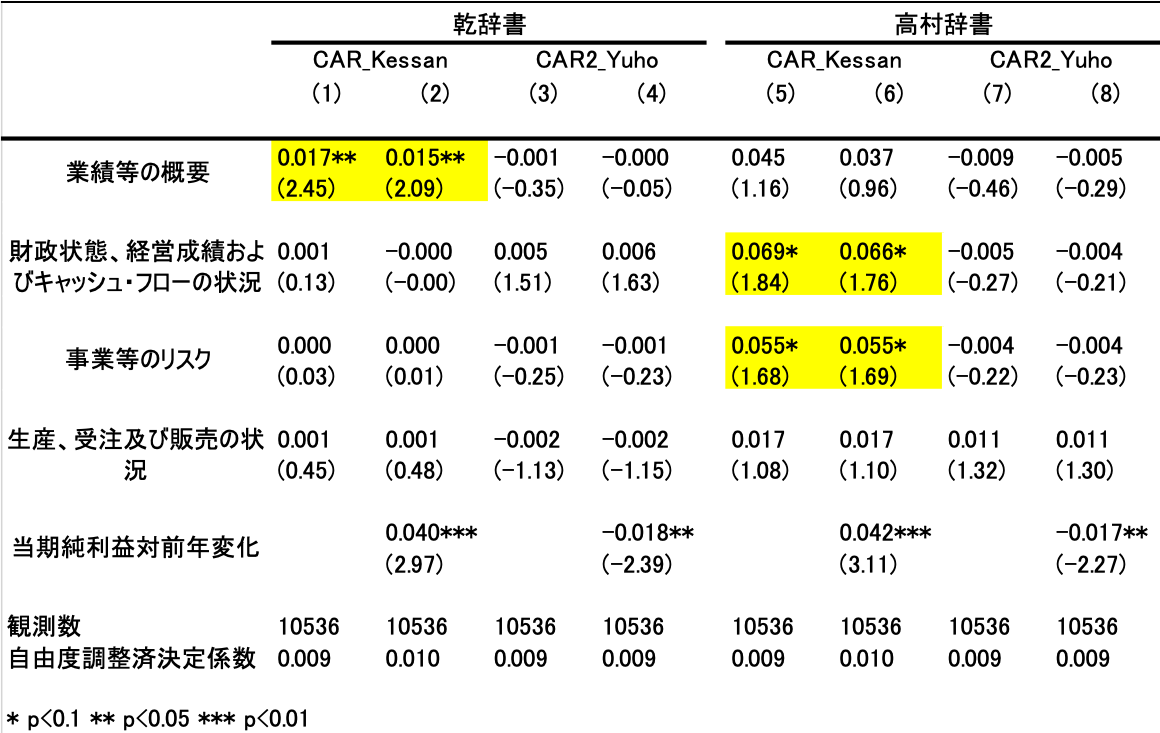

In [51]:
Image("./分析結果.png")

## これからの課題
- 否定文のネガティブ／ポジティブの反転
- 決算短信の記述情報のトーン分析